**If you want to run this notebook, please make a copy and run the copy**

---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_text
import math
# %matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetFinal.csv to datasetFinal.csv


In [ ]:
df = pd.read_csv("datasetFinal.csv")
df.head()

,ID,Statement,Label,barely true,false count,half true count,mostly true,pants on fire,nouns,verbs,prepositions,Sentences
0,0,Over the past five years the federal governmen...,True,1.0,2.0,1.0,1.0,0.0,6,1,2,1
1,1,Says that Tennessee law requires that schools ...,True,0.0,0.0,0.0,0.0,0.0,11,2,6,1
2,2,Donald Trump is against marriage equality. He ...,True,0.0,0.0,0.0,0.0,0.0,4,0,1,2
3,3,Says the unemployment rate for college graduat...,True,12.0,16.0,13.0,7.0,5.0,6,4,3,1
4,4,"Each year, 18,000 people die in America becaus...",True,40.0,29.0,69.0,76.0,7.0,5,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3052 non-null   int64  
 1   Statement        3052 non-null   object 
 2   Label            3052 non-null   bool   
 3   barely true      3051 non-null   float64
 4   false count      3051 non-null   float64
 5   half true count  3051 non-null   float64
 6   mostly true      3051 non-null   float64
 7   pants on fire    3051 non-null   float64
 8   nouns            3052 non-null   int64  
 9   verbs            3052 non-null   int64  
 10  prepositions     3052 non-null   int64  
 11  Sentences        3052 non-null   int64  
dtypes: bool(1), float64(5), int64(5), object(1)
memory usage: 265.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


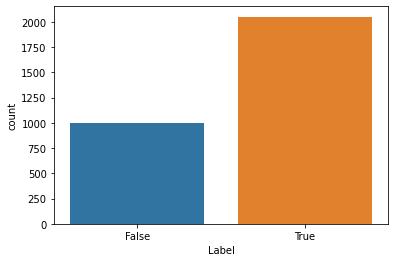

In [ ]:
sns.countplot(df['Label'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


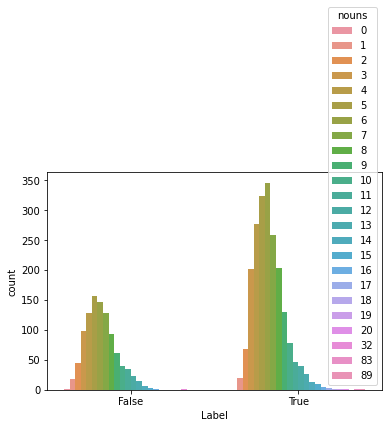

In [ ]:
sns.countplot(df['Label'],hue=df['nouns'])

In [ ]:
df.loc[df['Label'] == True, ['Label']] = 1
df.loc[(df['Label'] == False), ['Label']] = 0
df = df.dropna()
df

,ID,Statement,Label,barely true,false count,half true count,mostly true,pants on fire,nouns,verbs,prepositions,Sentences
0,0,Over the past five years the federal governmen...,1,1.0,2.0,1.0,1.0,0.0,6,1,2,1
1,1,Says that Tennessee law requires that schools ...,1,0.0,0.0,0.0,0.0,0.0,11,2,6,1
2,2,Donald Trump is against marriage equality. He ...,1,0.0,0.0,0.0,0.0,0.0,4,0,1,2
3,3,Says the unemployment rate for college graduat...,1,12.0,16.0,13.0,7.0,5.0,6,4,3,1
4,4,"Each year, 18,000 people die in America becaus...",1,40.0,29.0,69.0,76.0,7.0,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3047,1671,"During the Bush administration, you actually h...",1,1.0,0.0,0.0,0.0,0.0,6,0,4,1
3048,1672,Nearly half of Hispanic voters in Arizona's la...,1,40.0,29.0,69.0,76.0,7.0,6,2,3,1
3049,1673,"Since the Affordable Care Act passed, 90 perce...",1,0.0,0.0,0.0,0.0,0.0,7,1,3,1
3050,1674,Debt has almost doubled in Austin under Gov. P...,1,2.0,3.0,5.0,7.0,3.0,4,0,2,2


In [ ]:
X = df.drop('ID', axis=1).drop('Label', axis=1).drop('Statement', axis=1)
y = df[['Label']]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X

,barely true,false count,half true count,mostly true,pants on fire,nouns,verbs,prepositions,Sentences
0,1.0,2.0,1.0,1.0,0.0,6,1,2,1
1,0.0,0.0,0.0,0.0,0.0,11,2,6,1
2,0.0,0.0,0.0,0.0,0.0,4,0,1,2
3,12.0,16.0,13.0,7.0,5.0,6,4,3,1
4,40.0,29.0,69.0,76.0,7.0,5,1,2,1
...,...,...,...,...,...,...,...,...,...
3047,1.0,0.0,0.0,0.0,0.0,6,0,4,1
3048,40.0,29.0,69.0,76.0,7.0,6,2,3,1
3049,0.0,0.0,0.0,0.0,0.0,7,1,3,1
3050,2.0,3.0,5.0,7.0,3.0,4,0,2,2


In [ ]:
y

,Label
0,1
1,1
2,1
3,1
4,1
...,...
3047,1
3048,1
3049,1
3050,1


In [ ]:
# X_train = np.array([0 if (math.isnan(value)) else value for value in X_train])
# y_train = np.array([0 if (math.isnan(value)) else value for value in y_train])
# X_test = np.array([0 if (math.isnan(value)) else value for value in X_test])
# y_test = np.array([0 if (math.isnan(value)) else value for value in y_test])

In [ ]:
X_train

,barely true,false count,half true count,mostly true,pants on fire,nouns,verbs,prepositions,Sentences
1190,7.0,4.0,5.0,4.0,1.0,1,0,2,1
337,9.0,8.0,10.0,18.0,3.0,5,0,1,1
2856,40.0,29.0,69.0,76.0,7.0,4,0,0,1
177,1.0,0.0,0.0,0.0,0.0,6,1,2,1
1389,3.0,0.0,4.0,2.0,0.0,8,0,1,1
...,...,...,...,...,...,...,...,...,...
682,26.0,41.0,32.0,40.0,11.0,3,1,1,1
904,1.0,2.0,2.0,0.0,1.0,6,3,3,1
2314,70.0,71.0,160.0,163.0,9.0,5,0,1,1
2975,0.0,0.0,0.0,1.0,0.0,6,2,5,1


In [ ]:
# y_train.astype('int64')
# y_train.dtypes
# y_train['Label'].astype('int64')
y_train

,Label
1190,0
337,1
2856,1
177,1
1389,1
...,...
682,0
904,0
2314,1
2975,1


In [ ]:
clf_model = DecisionTreeClassifier(criterion="gini")#, random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = clf_model.predict(X_test)

In [ ]:
y_test

,Label
1506,1
319,1
920,0
2803,1
2207,1
...,...
510,0
175,1
795,0
1300,0


In [ ]:
y_test = y_test.to_numpy()
y_test = np.array([0 if (math.isnan(value)) else value for value in y_test])
y_test = y_test.astype('int64')
y_test.dtype

dtype('int64')

In [ ]:
print(accuracy_score(y_test,y_predict)*100, '%')

70.24901703800786 %


In [ ]:
target = list(df['Label'].unique())
feature_names = list(X.columns)

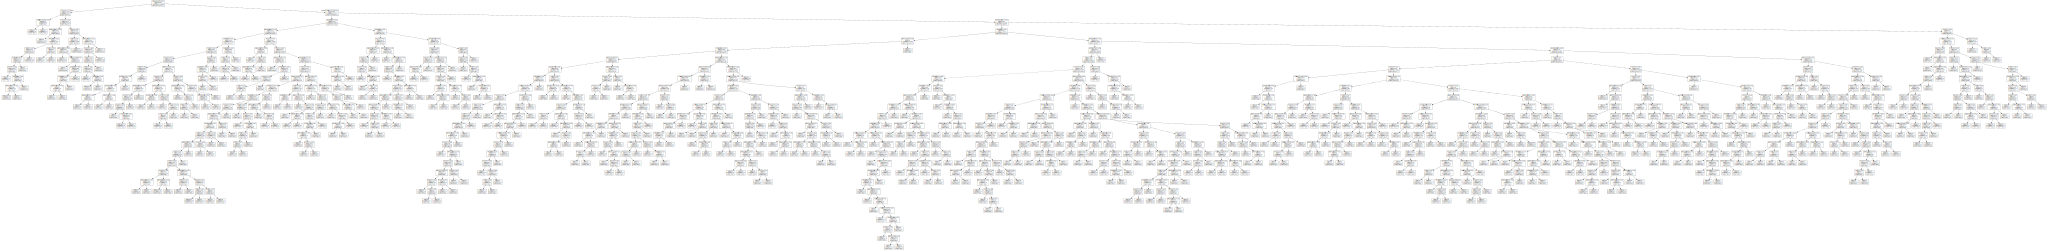

In [ ]:
dot_data = tree.export_graphviz(clf_model,
  out_file=None, 
  feature_names=feature_names,  
  # class_names=target,  
  # filled=True, 
  # rounded=True,  
  # special_characters=True
)  
graph = graphviz.Source(dot_data)  

graph

In [ ]:
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- false count <= 0.50
|   |--- nouns <= 1.50
|   |   |--- half true count <= 2.00
|   |   |   |--- class: 1
|   |   |--- half true count >  2.00
|   |   |   |--- class: 0
|   |--- nouns >  1.50
|   |   |--- nouns <= 3.50
|   |   |   |--- prepositions <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- prepositions >  1.50
|   |   |   |   |--- mostly true <= 2.50
|   |   |   |   |   |--- verbs <= 0.50
|   |   |   |   |   |   |--- barely true <= 0.50
|   |   |   |   |   |   |   |--- nouns <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- nouns >  2.50
|   |   |   |   |   |   |   |   |--- mostly true <= 0.50
|   |   |   |   |   |   |   |   |   |--- prepositions <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- prepositions >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- mostly true >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |

In [ ]:
graph.save('graph1.jpg')

'graph1.jpg'